In [19]:
#ライブラリをインポート
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from src import config
from pathlib import Path

In [20]:
# インポート元のフォルダを設定
folder_path = Path(config.DATA_PATH) # この部分を自分のフォルダに合わせて設定してください
try:
    csv_files = list(folder_path.glob('*/*.csv'))
    #print(f"read csv successfully: {csv_files}")
except:
    print("Import error!")

# CSVファイルをDataFrame形式に変換
list_of_dfs = []
labels = []

for file in csv_files:
    df = pd.read_csv(file)
    if "clean" in str(file): # clean: 正常
        label = pd.Series([0]*len(df))
    else:
        label = pd.Series([1]*len(df))
    list_of_dfs.append(df)
    labels.append(label)


X = pd.concat(list_of_dfs, ignore_index=True, axis=0)
y = pd.concat(labels, ignore_index=True, axis=0)

In [21]:
# データの確認(ここで、MLに入力できない特徴量を確認する)
# この場合だとtimeが扱えない
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 73 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   time                                     4200 non-null   object 
 1   cpu_usage_pct                            4200 non-null   float64
 2   ram_usage_pct                            4200 non-null   float64
 3   network_in                               4200 non-null   float64
 4   network_out                              4200 non-null   float64
 5   block:block_bio_backmerge                4200 non-null   int64  
 6   block:block_bio_remap                    4200 non-null   int64  
 7   block:block_dirty_buffer                 4200 non-null   int64  
 8   block:block_getrq                        4200 non-null   int64  
 9   block:block_touch_buffer                 4200 non-null   int64  
 10  block:block_unplug                       4200 no

In [22]:
# データの前処理
# 不要な特徴量(time)を削除
X = X.drop(columns=['time'])

# データを学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 正規化
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [23]:
# モデルのインポート
models = [RandomForestClassifier, LinearRegression, RandomForestClassifier, KNeighborsClassifier]
scores = []

for model in models:
    clf = model()

    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    # 結果の確認
    score = clf.score(X_test, y_test)
    scores.append(score)
    print(f"Model name: {model.__name__}")
    print(f"    accuracy: {score}\n")

Model name: RandomForestClassifier
    accuracy: 1.0

Model name: LinearRegression
    accuracy: 0.3207567526814187

Model name: RandomForestClassifier
    accuracy: 1.0

Model name: KNeighborsClassifier
    accuracy: 0.9126984126984127



Model name: KNeighborsClassifier
    accuracy: 1.0



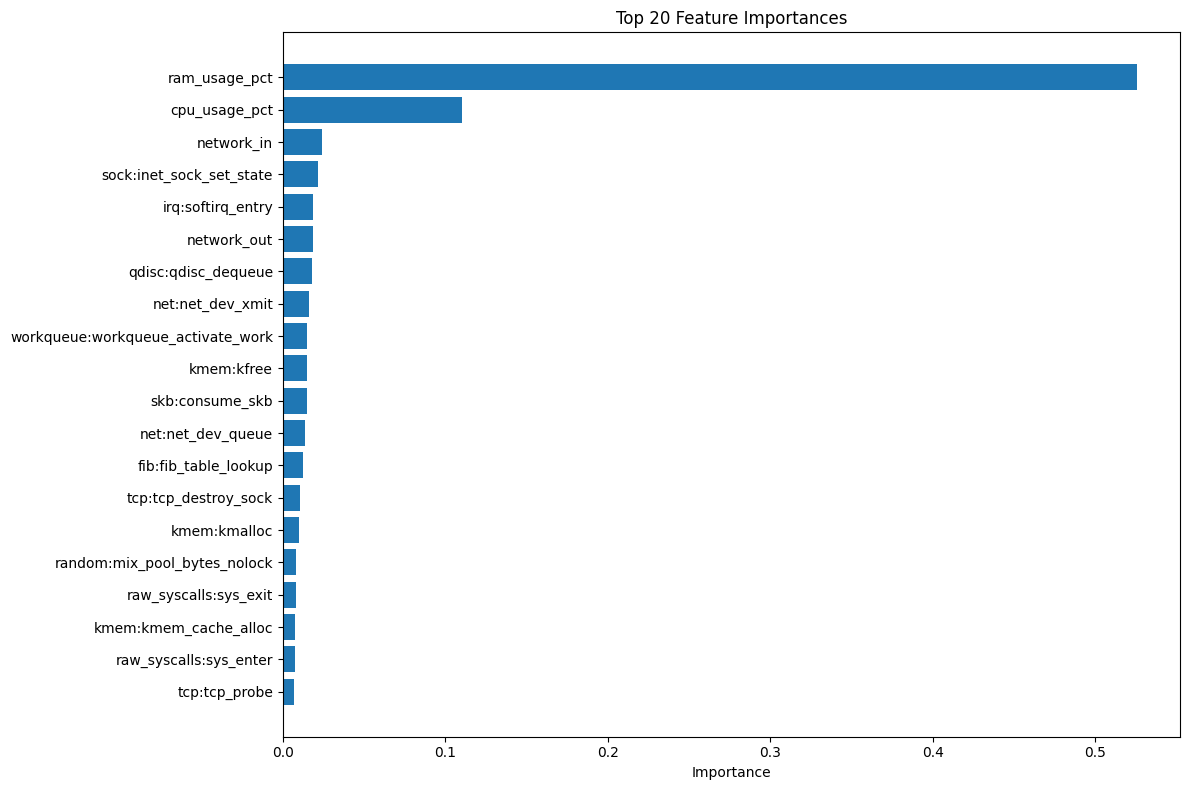


All Feature Importances:
ram_usage_pct: 0.525830
cpu_usage_pct: 0.110557
network_in: 0.024308
sock:inet_sock_set_state: 0.021937
irq:softirq_entry: 0.018647
network_out: 0.018622
qdisc:qdisc_dequeue: 0.017921
net:net_dev_xmit: 0.015918
workqueue:workqueue_activate_work: 0.015040
kmem:kfree: 0.014881
skb:consume_skb: 0.014645
net:net_dev_queue: 0.013620
fib:fib_table_lookup: 0.012303
tcp:tcp_destroy_sock: 0.010267
kmem:kmalloc: 0.009881
random:mix_pool_bytes_nolock: 0.007816
raw_syscalls:sys_exit: 0.007788
kmem:kmem_cache_alloc: 0.007604
raw_syscalls:sys_enter: 0.007467
tcp:tcp_probe: 0.007039
ipi:ipi_raise: 0.006735
page-faults: 0.005900
kmem:kmem_cache_free: 0.005376
timer:timer_start: 0.005318
kmem:mm_page_alloc_zone_locked: 0.005228
sched:sched_wakeup: 0.005138
cs: 0.005034
irq:irq_handler_entry: 0.004737
pagemap:mm_lru_insertion: 0.004623
block:block_touch_buffer: 0.004330
sched:sched_switch: 0.004257
jbd2:jbd2_handle_start: 0.003612
sched:sched_process_wait: 0.003594
kmem:mm_page

In [24]:
import matplotlib.pyplot as plt
import numpy as np

clf = RandomForestClassifier()

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
importances = clf.feature_importances_

# 結果の確認
score = clf.score(X_test, y_test)
scores.append(score)
print(f"Model name: {model.__name__}")
print(f"    accuracy: {score}\n")

# Feature importanceの可視化
# 重要度が高い順にソート
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# 上位20個の特徴量をプロット
top_n = 20
plt.figure(figsize=(12, 8))
plt.title(f'Top {top_n} Feature Importances')
plt.barh(range(top_n), importances[indices[:top_n]])
plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]])
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 全ての特徴量の重要度を表示
print("\nAll Feature Importances:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.6f}")